In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import PIL as pil  # Image Library in Python "Pillow Library"
import tensorflow as tf

# Downloading flowers dataset

In [2]:
# Downloading flowers dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# Directory name = 'flower_photos', destination = 'cache_dir', to unzip the zip file = 'untar=True'
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='./', untar=True)
data_dir

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 50s 0us/step


'./datasets\\flower_photos'

# Converting the data_dir to pathlib

In [3]:
import pathlib
# Going through each images and converting them into numpy array using the help of pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [4]:
list(data_dir.glob('*/*.jpg'))  # List of All the images path with .jpg
images_count = len(list(data_dir.glob('*/*.jpg')))
images_count

3670

# Showimg images in PIL

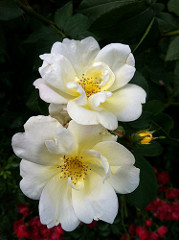

In [27]:
roses = list(data_dir.glob('roses/*'))
pil.Image.open(str(roses[0]))

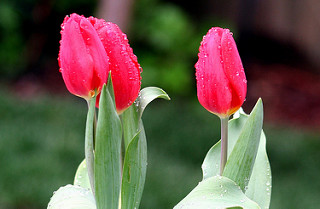

In [28]:
tulips = list(data_dir.glob('tulips/*'))
pil.Image.open(str(tulips[0]))

In [29]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandeline': list(data_dir.glob('dandeline/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandeline': 2,
    'sunflowers': 3,
    'tulips': 4
}

# Images to 3d numpy array using OpenCV

In [33]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [34]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [36]:
# Doing the above for all the images
x, y = [], []
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180, 180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [40]:
x = np.array(x)
y = np.array(y)

# Training & Testing Data

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2217, 180, 180, 3), (555, 180, 180, 3), (2217,), (555,))

# Scalling Data

In [45]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

# CNN Model

In [47]:
cnn = tf.keras.models.Sequential([
    # CNN
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    # Dense
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='sigmoid')
])

cnn.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

cnn.fit(x_train_scaled, y_train, epochs=10)

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 150ms/step - accuracy: 0.4147 - loss: 1.3787
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 151ms/step - accuracy: 0.6240 - loss: 0.9099
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 153ms/step - accuracy: 0.7034 - loss: 0.7233
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - accuracy: 0.7738 - loss: 0.5986
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 153ms/step - accuracy: 0.8604 - loss: 0.3747
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 20s 147ms/step - accuracy: 0.9134 - loss: 0.2435
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 151ms/step - accuracy: 0.9366 - loss: 0.1773
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - accuracy: 0.9637 - loss: 0.1143
Epoch 9/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - accuracy: 0.9893 - loss: 0.0367
Epoch 10/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - accuracy: 0.9859 - loss: 0.0509


In [48]:
cnn.evaluate(x_test_scaled, y_test)

 1/18 ━━━━━━━━━━━━━━━━━━━━ 4s 244ms/step - accuracy: 0.6562 - loss: 1.4940

c:\Users\User\OneDrive\Desktop\Python\Lib\site-packages\keras\src\backend\tensorflow\nn.py:625: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.6649 - loss: 1.7203


[1.6170395612716675, 0.6720720529556274]

# The CNN Model is doing greate on Training sample(accuracy: 0.9859) but doing horrible on Testing sample(accuracy: 0.6707);
# This is because of Overfitting which we can cure using "Data Augmentation"*

In [51]:
data_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.RandomZoom(0.3),
])

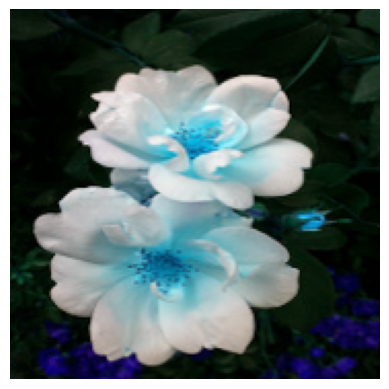

In [55]:
plt.axis('off')
plt.imshow(x[0])

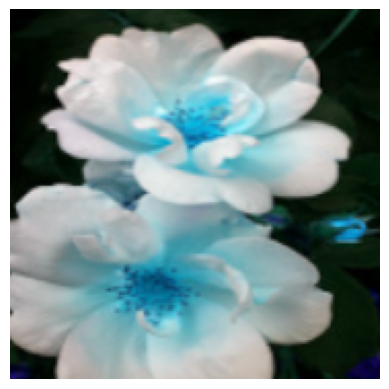

In [68]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

In [77]:
data_augmentation_1 = tf.keras.models.Sequential([
    tf.keras.layers.RandomContrast(0.9),
])

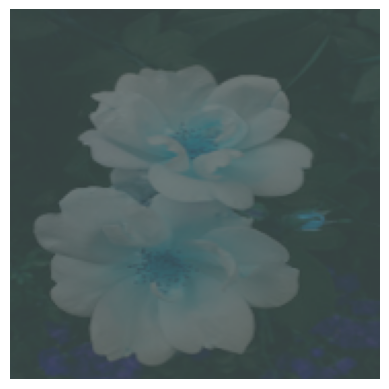

In [78]:
plt.axis('off')
plt.imshow(data_augmentation_1(x)[0].numpy().astype("uint8"))

In [79]:
data_augmentation_2 = tf.keras.models.Sequential([
    tf.keras.layers.RandomRotation(0.9),
])

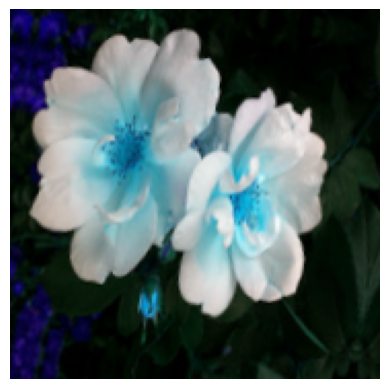

In [80]:
plt.axis('off')
plt.imshow(data_augmentation_2(x)[0].numpy().astype("uint8"))

# Creating Data Augmentattion

In [86]:
data_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    tf.keras.layers.RandomContrast(0.5),
    tf.keras.layers.RandomRotation(0.5),
    tf.keras.layers.RandomZoom(0.5)
])

In [92]:
cnn = tf.keras.models.Sequential([
    # Data Augmentation
    data_augmentation,
    # CNN
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    # Dropout
    tf.keras.layers.Dropout(0.2),
    # Dense
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='sigmoid')
])

cnn.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

cnn.fit(x_train_scaled, y_train, epochs=30)

Epoch 1/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 229ms/step - accuracy: 0.3358 - loss: 1.5833
Epoch 2/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 16s 232ms/step - accuracy: 0.5387 - loss: 1.0730
Epoch 3/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 18s 259ms/step - accuracy: 0.6035 - loss: 0.9228
Epoch 4/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 16s 225ms/step - accuracy: 0.6082 - loss: 0.8995
Epoch 5/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 18s 250ms/step - accuracy: 0.6289 - loss: 0.8632
Epoch 6/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 17s 238ms/step - accuracy: 0.6249 - loss: 0.8458
Epoch 7/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 16s 227ms/step - accuracy: 0.6418 - loss: 0.8201
Epoch 8/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 16s 231ms/step - accuracy: 0.6674 - loss: 0.7742
Epoch 9/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 16s 228ms/step - accuracy: 0.6626 - loss: 0.7535
Epoch 10/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 16s 225ms/step - accuracy: 0.6745 - loss: 0.7723
Epoch 11/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 17s 246ms/step - accuracy: 0.6825 - loss: 0.7457
Epoch 12/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 17

In [93]:
cnn.evaluate(x_test_scaled, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7261 - loss: 0.6150


[0.6376415491104126, 0.7495495676994324]